In [21]:
import pandas as pd

In [23]:
gm_close=pd.read_csv('GM_close_last_3_years.csv')

In [24]:
gm_close

,Date,GM_Close
0,2022-02-22,45.592503
1,2022-02-23,45.212315
2,2022-02-24,45.183064
3,2022-02-25,46.235889
4,2022-02-28,45.543758
...,...,...
744,2025-02-10,46.570000
745,2025-02-11,46.700001
746,2025-02-12,47.689999
747,2025-02-13,47.889999


In [25]:
type(gm_close)

pandas.core.frame.DataFrame

In [26]:
gm_close = gm_close.set_index('Date')

In [27]:
gm_close

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758
...,...
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999


In [28]:
gm_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 2022-02-22 to 2025-02-14
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GM_Close  749 non-null    float64
dtypes: float64(1)
memory usage: 11.7+ KB


In [29]:
gm_close.head()

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758


In [30]:
gm_close.tail()

,GM_Close
Date,
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999
2025-02-13,47.889999
2025-02-14,48.369999


In [31]:
gm_close.describe()

,GM_Close
count,749.000000
mean,39.450386
std,6.842371
min,26.300797
25%,34.040394
50%,38.242329
75%,44.647621
max,60.064693


In [32]:
gm_close_df=gm_close

In [33]:
gm_close_df

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758
...,...
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999


# Time Series Analysis of General Motors (GM)

In [35]:
## Computing Daily Returns

gm_close_df["Daily Return"] = gm_close_df["GM_Close"].pct_change()

#Display the first few rows
gm_close_df[['GM_Close', 'Daily Return']].head()

,GM_Close,Daily Return
Date,,
2022-02-22,45.592503,NaN
2022-02-23,45.212315,-0.008339
2022-02-24,45.183064,-0.000647
2022-02-25,46.235889,0.023301
2022-02-28,45.543758,-0.014970


In [36]:
# Fill missing values using backward fill
gm_close_df = gm_close_df.fillna(method='bfill')

# Check if missing values still exist
gm_close_df.isnull().sum()

C:\Users\Amanp\AppData\Local\Temp\ipykernel_19048\1689637642.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gm_close_df = gm_close_df.fillna(method='bfill')


GM_Close        0
Daily Return    0
dtype: int64

In [37]:
gm_close_df

,GM_Close,Daily Return
Date,,
2022-02-22,45.592503,-0.008339
2022-02-23,45.212315,-0.008339
2022-02-24,45.183064,-0.000647
2022-02-25,46.235889,0.023301
2022-02-28,45.543758,-0.014970
...,...,...
2025-02-10,46.570000,-0.017303
2025-02-11,46.700001,0.002792
2025-02-12,47.689999,0.021199


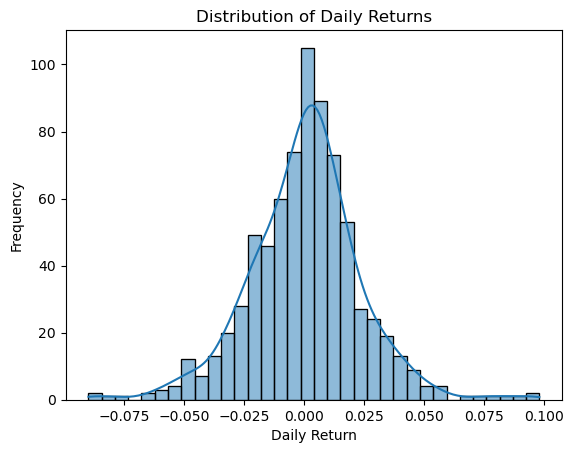

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for kde plot

sns.histplot(gm_close_df['Daily Return'], kde=True )

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

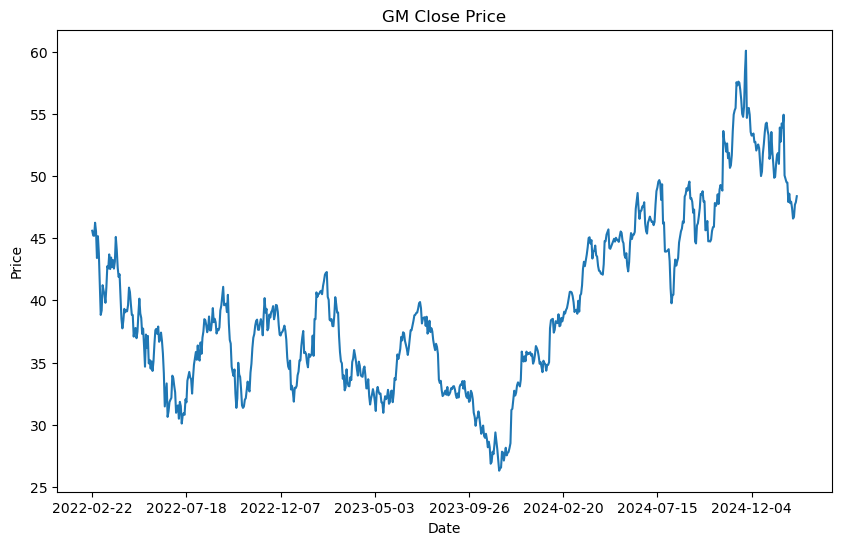

In [39]:
# Plotting the close price of Ford
plt.figure(figsize=(10,6))
gm_close_df['GM_Close'].plot()

#plt.plot(x,y)
plt.title('GM Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

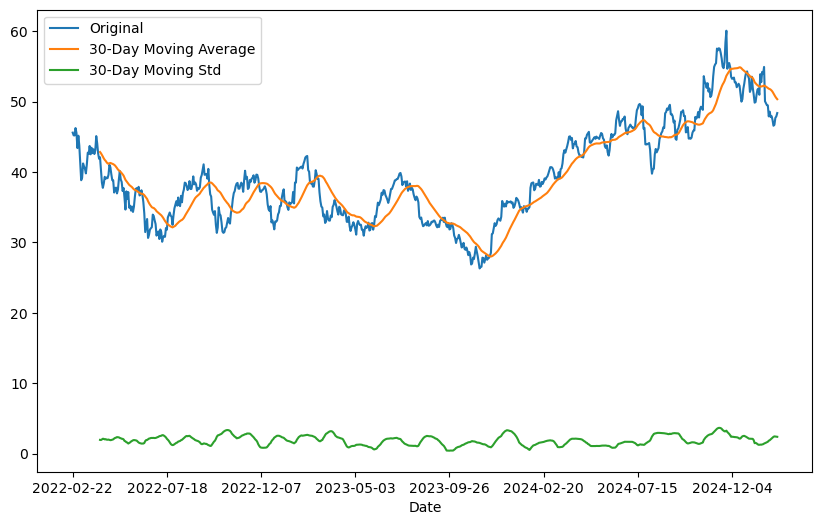

In [40]:
# Plot rolling mean(moving average) and standard deviation
gm_close_df['GM_Close'].plot(label='Original', figsize=(10,6))
#line plot of original stock prices

gm_close_df['GM_Close'].rolling(window=30).mean().plot(label='30-Day Moving Average')
#line plot rolling mean values

gm_close_df['GM_Close'].rolling(window=30).std().plot(label='30-Day Moving Std')
plt.legend()
plt.show()

In [41]:
#Handling OUTLIERS
from scipy import stats

#calculate z-scores
z_scores = stats.zscore(gm_close_df)

# Define a threshold for outliers (absolute Z-score > 3)
outliers = gm_close_df[abs(z_scores) > 3]

# Display the outliers
outliers

,GM_Close,Daily Return
Date,,
2022-02-22,NaN,NaN
2022-02-23,NaN,NaN
2022-02-24,NaN,NaN
2022-02-25,NaN,NaN
2022-02-28,NaN,NaN
...,...,...
2025-02-10,NaN,NaN
2025-02-11,NaN,NaN
2025-02-12,NaN,NaN


In [42]:
outliers.dropna()

,GM_Close,Daily Return
Date,,


### Decomposition of time series

In [44]:
# Perform seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x800 with 0 Axes>

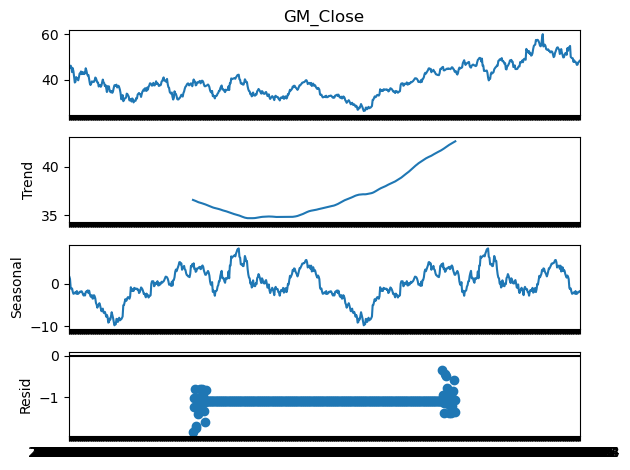

In [45]:
# Decompose the series
decomposition = seasonal_decompose(gm_close_df['GM_Close'], model="additive" ,period=365)

# Plot the decomposition results
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


<Figure size 1200x800 with 0 Axes>

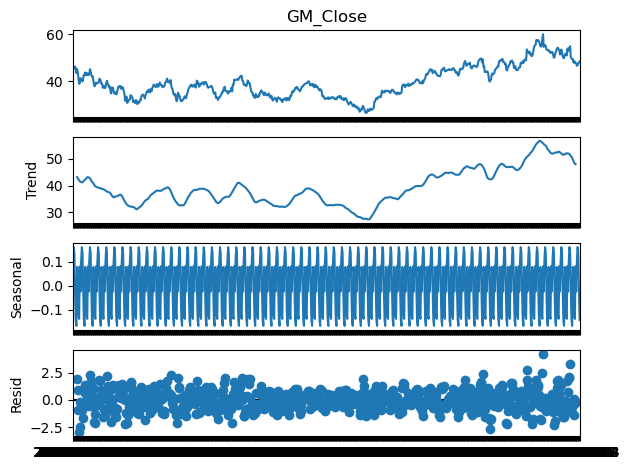

In [46]:
# Decompose the series
decomposition = seasonal_decompose(gm_close_df['GM_Close'], model="additive", period=12)

# Plot the decomposition results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
decomposition.plot() #line plots
plt.show()

<Figure size 2200x1800 with 0 Axes>

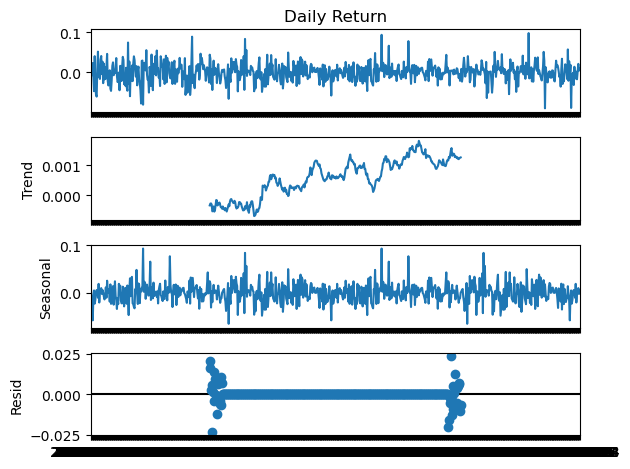

In [47]:
# Decompose the series
decomposition = seasonal_decompose(gm_close_df['Daily Return'], model="additive", period=365)

# Plot the decomposition results
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
decomposition.plot() #line plots
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'GM_Close' series
adf_result = adfuller(gm_close_df['GM_Close'])

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values

(-1.7213621174378704,
 0.4201410367468193,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152})

In [49]:
gm_close_df.drop('Daily Return', axis=1, inplace=True)
gm_close_df

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758
...,...
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999


<Figure size 800x600 with 0 Axes>

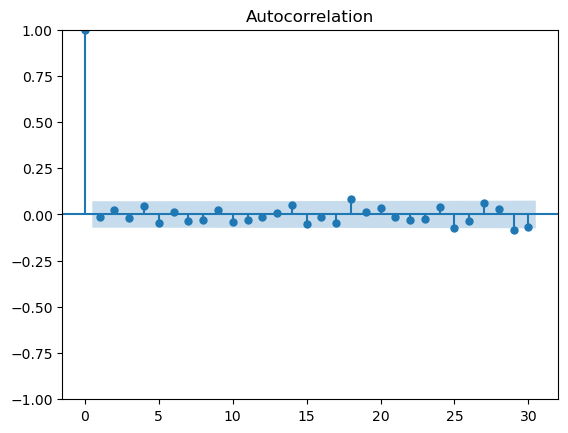

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Perform first differencing
GM_adj_close_diff = gm_close_df.diff().dropna()

# Plot ACF for differenced data
plt.figure(figsize=(8, 6))
plot_acf(GM_adj_close_diff, lags=30)
plt.show()

<Figure size 800x600 with 0 Axes>

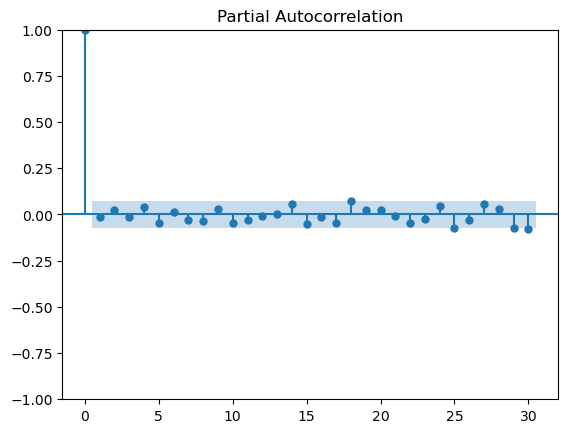

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for the differenced data
plt.figure(figsize=(8, 6))
plot_pacf(GM_adj_close_diff, lags=30)
plt.show()

In [52]:
gm_close_df

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758
...,...
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999


## auto_srima_and_arima

In [54]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2475.286, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2299.909, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2477.029, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2213.368, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2166.050, Time=0.40 sec
 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=3.00 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=2164.261, Time=0.29 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=2211.369, Time=0.16 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(3,1,0)[4]             : AIC=2166.049, Time=0.29 sec
 ARIMA(1,1,1)(3,1,0)[4]             : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=2166.259, Time=0.95 s

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000029176A2CFB0>.

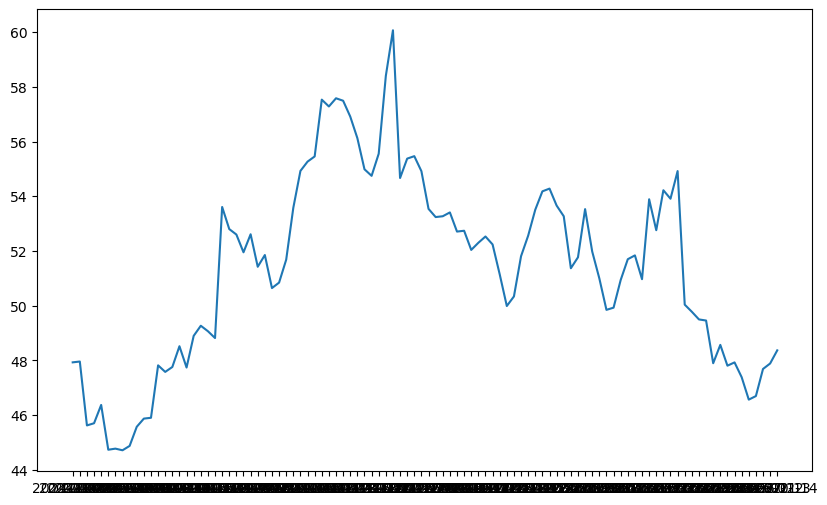

In [55]:
# Fit auto_arima model (with seasonal component)
import pmdarima as pm
auto_sarima = pm.auto_arima(gm_close_df,
                            seasonal=True,
                            m=4,  # Assuming quaterly seasonality
                            start_p=0, start_q=0,
                            test='adf',
                            max_p=3, max_q=3,
                            start_P=0, start_Q=0,
                            max_P=3, max_Q=3,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 periods
forecast_sarima = auto_sarima.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(gm_close_df.index[-100:], gm_close_df[-100:], label='Observed')
plt.plot(pd.date_range(gm_close_df.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2002.978, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2004.831, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2004.838, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2000.990, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2002.590, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.013 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  749
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -999.495
Date:                Mon, 03 Mar 2025   AIC                           2000.990
Time:                        00:54:35   BIC                           2005.607
Sample:                             0   HQIC                          2002.769
                                - 749                                       

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000029107243F20>.

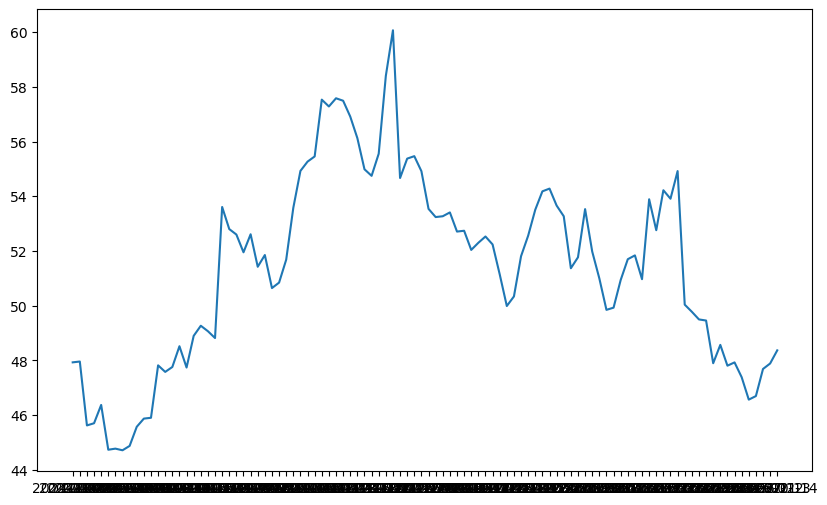

In [56]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA model
auto_model = pm.auto_arima(gm_close_df,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=5, max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast the next 30 days using the best ARIMA model
forecast = auto_model.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))

#line plot of original data or stock prices
plt.plot(gm_close_df.index[-100:], gm_close_df[-100:], label='Observed')

plt.plot(pd.date_range(gm_close_df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast')
plt.legend()
plt.show()


## with prophet

In [58]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [59]:
gm_close_df

,GM_Close
Date,
2022-02-22,45.592503
2022-02-23,45.212315
2022-02-24,45.183064
2022-02-25,46.235889
2022-02-28,45.543758
...,...
2025-02-10,46.570000
2025-02-11,46.700001
2025-02-12,47.689999


00:54:55 - cmdstanpy - INFO - Chain [1] start processing
00:54:56 - cmdstanpy - INFO - Chain [1] done processing


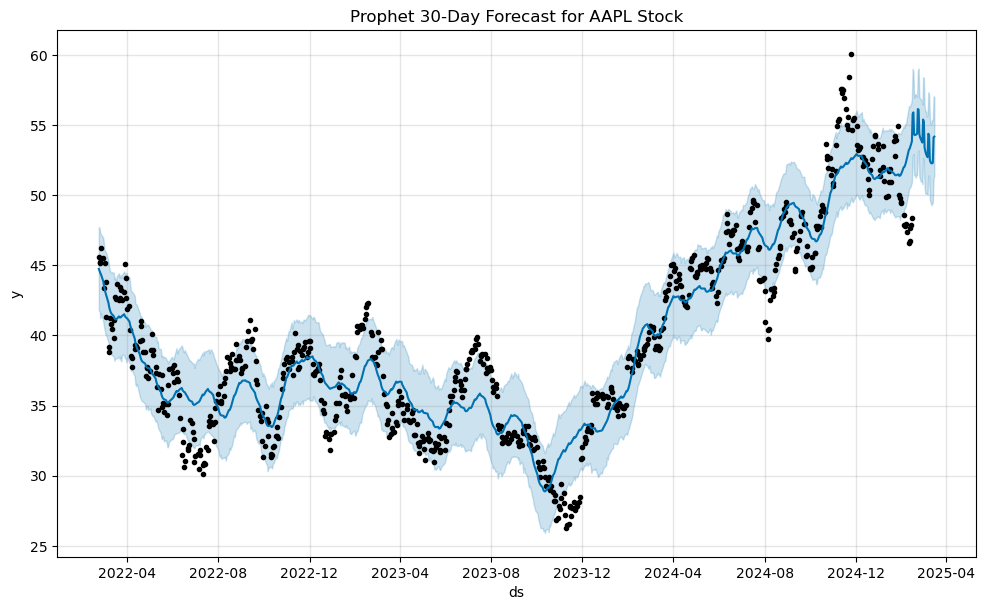

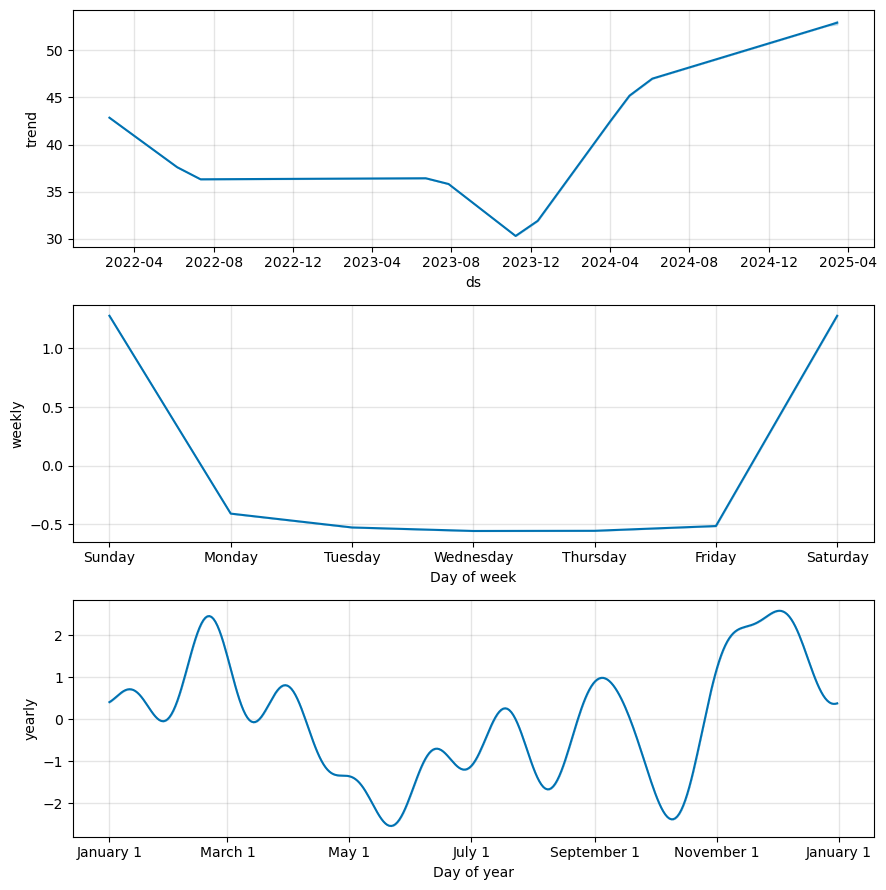

In [60]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data = gm_close_df.reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model = Prophet()

# Fit the model on the historical data
model.fit(prophet_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet 30-Day Forecast for AAPL Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


In [63]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-22,42.858862,41.768085,47.716127,42.858862,42.858862,1.877539,1.877539,1.877539,-0.525766,-0.525766,-0.525766,2.403305,2.403305,2.403305,0.0,0.0,0.0,44.736401
1,2022-02-23,42.808408,41.746093,47.645896,42.808408,42.808408,1.783414,1.783414,1.783414,-0.555671,-0.555671,-0.555671,2.339085,2.339085,2.339085,0.0,0.0,0.0,44.591822
2,2022-02-24,42.757954,41.215413,47.312294,42.757954,42.757954,1.696738,1.696738,1.696738,-0.554260,-0.554260,-0.554260,2.250998,2.250998,2.250998,0.0,0.0,0.0,44.454692
3,2022-02-25,42.707500,41.587377,47.196055,42.707500,42.707500,1.627264,1.627264,1.627264,-0.513683,-0.513683,-0.513683,2.140947,2.140947,2.140947,0.0,0.0,0.0,44.334764
4,2022-02-28,42.556139,40.984390,46.966789,42.556139,42.556139,1.297240,1.297240,1.297240,-0.407726,-0.407726,-0.407726,1.704966,1.704966,1.704966,0.0,0.0,0.0,43.853379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2025-03-12,52.847548,49.292581,55.099096,52.720688,53.004011,-0.574124,-0.574124,-0.574124,-0.555671,-0.555671,-0.555671,-0.018454,-0.018454,-0.018454,0.0,0.0,0.0,52.273423
775,2025-03-13,52.868436,49.369749,55.352678,52.729767,53.037924,-0.608620,-0.608620,-0.608620,-0.554260,-0.554260,-0.554260,-0.054360,-0.054360,-0.054360,0.0,0.0,0.0,52.259816
776,2025-03-14,52.889325,49.457413,55.310704,52.737132,53.072655,-0.582744,-0.582744,-0.582744,-0.513683,-0.513683,-0.513683,-0.069061,-0.069061,-0.069061,0.0,0.0,0.0,52.306580
777,2025-03-15,52.910213,51.218291,57.042148,52.742698,53.102550,1.215109,1.215109,1.215109,1.278554,1.278554,1.278554,-0.063444,-0.063444,-0.063444,0.0,0.0,0.0,54.125322


In [66]:
future

,ds
0,2022-02-22
1,2022-02-23
2,2022-02-24
3,2022-02-25
4,2022-02-28
...,...
774,2025-03-12
775,2025-03-13
776,2025-03-14
777,2025-03-15
